# Investigate alleles that increased abundance

Almost all variants with abundance changes that surpass assay variability are decreases in abundance. For the very few cases that increased abundance, we want to see if there is anything biologically interesting going on here.

In [1]:
import polars as pl

In [2]:
outputs_dir = "../3_outputs"

In [3]:
scores = pl.read_csv(f"{outputs_dir}/DUALIPA_median_zscore.csv")
incr_abun = scores.filter(pl.col("zscore_log2") > 3)
print(incr_abun.select(['symbol', 'aa_change', 'zscore_log2', 'clinvar_clnsig_clean', 'StarStatus']))

shape: (8, 5)
┌────────┬───────────┬─────────────┬──────────────────────┬────────────┐
│ symbol ┆ aa_change ┆ zscore_log2 ┆ clinvar_clnsig_clean ┆ StarStatus │
│ ---    ┆ ---       ┆ ---         ┆ ---                  ┆ ---        │
│ str    ┆ str       ┆ f64         ┆ str                  ┆ f64        │
╞════════╪═══════════╪═════════════╪══════════════════════╪════════════╡
│ MID1   ┆ Pro151Leu ┆ 3.068917    ┆ 4_VUS                ┆ 1.0        │
│ KLHL3  ┆ Glu85Ala  ┆ 3.67509     ┆ 1_Pathogenic         ┆ null       │
│ KLHL3  ┆ Ala77Glu  ┆ 3.574381    ┆ 1_Pathogenic         ┆ null       │
│ TPM1   ┆ Lys15Asn  ┆ 3.970668    ┆ 3_Conflicting        ┆ 1.0        │
│ BAG3   ┆ Leu462Pro ┆ 4.011861    ┆ 1_Pathogenic         ┆ 1.0        │
│ TPM1   ┆ Ala22Thr  ┆ 3.159836    ┆ 3_Conflicting        ┆ 1.0        │
│ KLHL3  ┆ Cys164Phe ┆ 4.221352    ┆ 1_Pathogenic         ┆ null       │
│ HBD    ┆ Glu27Asp  ┆ 4.089268    ┆ 5_Others             ┆ null       │
└────────┴───────────┴─────────────┴─

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

symbol_medians = scores.filter(~pl.col("zscore_log2").is_null()).group_by("symbol").agg(
    pl.col("zscore_log2").median().alias("median_log2")
).sort("median_log2")

symbol_order = symbol_medians.select('symbol').to_series().to_list()

scores_plot = scores.join(symbol_medians, on="symbol").to_pandas()
scores_plot['symbol'] = pd.Categorical(scores_plot['symbol'], categories=symbol_order, ordered=True)
scores_plot

,symbol,node_type,nt_change,aa_change,pla,well,coordinates,n_cells,orf_id,mut_id,...,symbol_right,aa_change_right,nt_change_right,ensembl_gene_id,collection,clinvar_clnsig_clean,gnomad_af,StarStatus,allele_0,median_log2
0,KCNJ2,allele,821A>T,Asp274Val,11,H06,11_H06,4976,100016069.0,2638.0,...,KCNJ2,Asp274Val,821A>T,ENSG00000123700,Edgotyping3,4_VUS,6.840530e-07,1.0,KCNJ2_Asp274Val,-5.907645
1,PKP2,allele,1415A>G,Lys472Arg,19,F05,19_F05,2900,54308.0,3072.0,...,PKP2,Lys472Arg,1415A>G,ENSG00000057294,Edgotyping3,4_VUS,NaN,2.0,PKP2_Lys472Arg,-0.176536
2,KCNJ2,allele,899G>A,Gly300Asp,11,D07,11_D07,8822,100016069.0,2641.0,...,KCNJ2,Gly300Asp,899G>A,ENSG00000123700,Edgotyping3,1_Pathogenic,NaN,2.0,KCNJ2_Gly300Asp,-5.907645
3,HBD,allele,174C>A,Asn58Lys,26,E05,26_E05,9609,13796.0,218146.0,...,HBD,Asn58Lys,174C>A,ENSG00000223609,CEGS2,5_Others,NaN,NaN,HBD_Asn58Lys,-5.732424
4,SMAD3,allele,376C>T,His126Tyr,20,H03,20_H03,9096,11805.0,2128.0,...,SMAD3,His126Tyr,376C>T,ENSG00000166949,Edgotyping3,4_VUS,NaN,1.0,SMAD3_His126Tyr,-1.119676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,DCX,allele,232C>T,Arg78Cys,8,B05,8_B05,7141,8416.0,216626.0,...,DCX,Arg78Cys,232C>T,ENSG00000077279,CEGS2,1_Pathogenic,NaN,2.0,DCX_Arg78Cys,-0.701219
1036,ALAS2,allele,1591A>G,Ser531Gly,4,G10,4_G10,10913,8420.0,216668.0,...,ALAS2,Ser531Gly,1591A>G,ENSG00000158578,CEGS2,1_Pathogenic,NaN,NaN,ALAS2_Ser531Gly,-0.335482
1037,STXBP1,allele,1217G>A,Arg406His,13,A09,13_A09,4229,7652.0,1827.0,...,STXBP1,Arg406His,1217G>A,ENSG00000136854,Edgotyping3,1_Pathogenic,NaN,2.0,STXBP1_Arg406His,-4.775023
1038,GFAP,allele,1157A>T,Asn386Ile,26,A11,26_A11,1714,2920.0,214447.0,...,GFAP,Asn386Ile,1157A>T,ENSG00000131095,CEGS2,1_Pathogenic,NaN,1.0,GFAP_Asn386Ile,-2.971982


<Figure size 640x480 with 0 Axes>

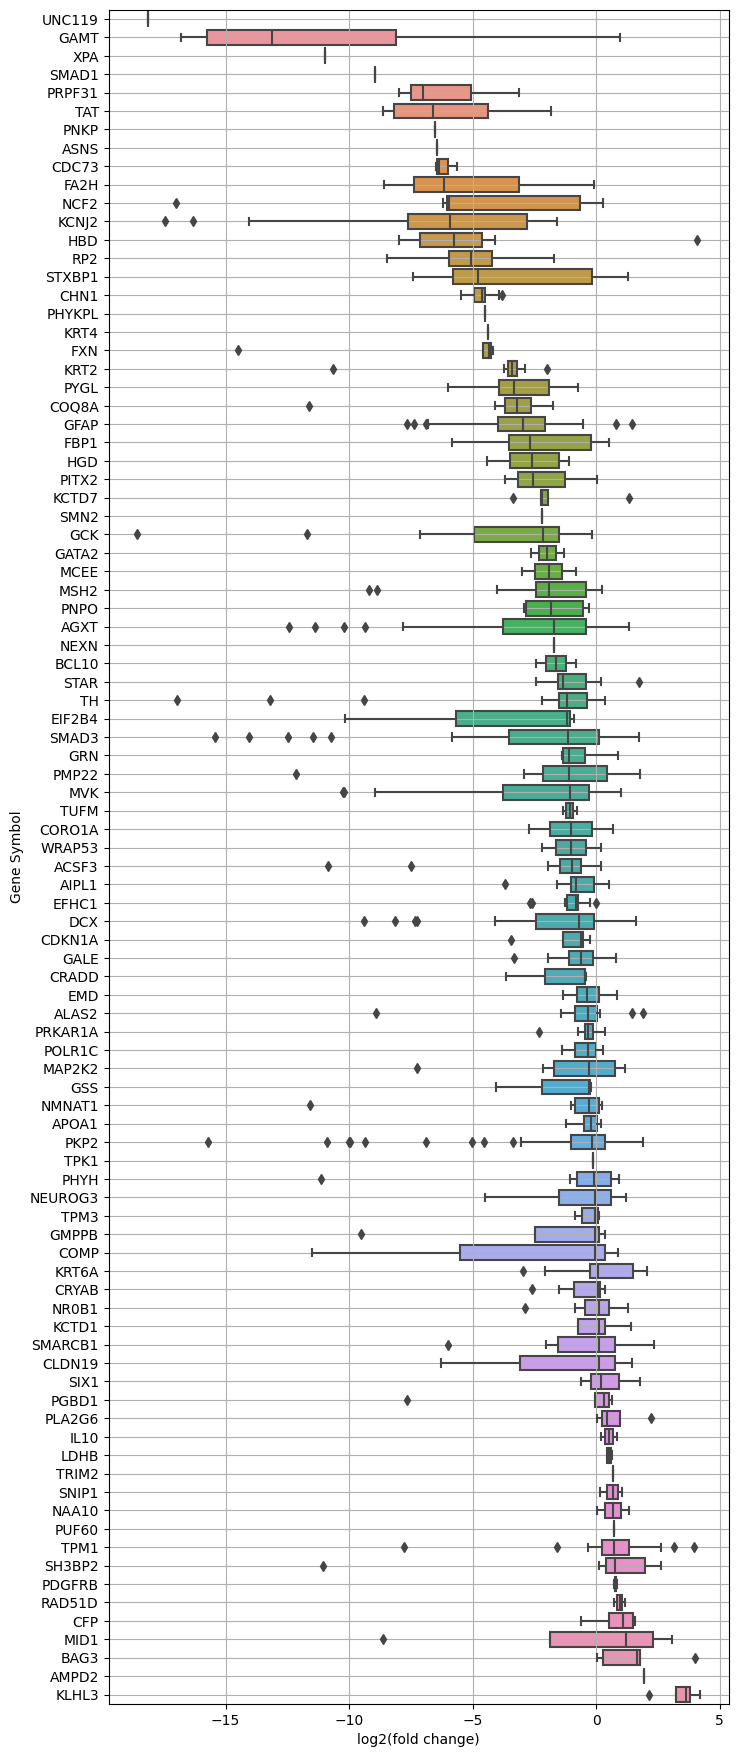

In [9]:
plt.clf()
fig, ax = plt.subplots(1,1,figsize=(8, 22))
sns.boxplot(data=scores_plot, x="zscore_log2", y="symbol", ax=ax)
ax.set_xlabel("log2(fold change)")
ax.set_ylabel("Gene Symbol")
ax.grid()
plt.show()